## Three steps that will cover the majority of cases:

### 1) are my data normally distributed? shapiro test
### 2) if yes: t-test
### 3) if no: u-test

In [1]:
from scipy import stats #the only import you actually need for this
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

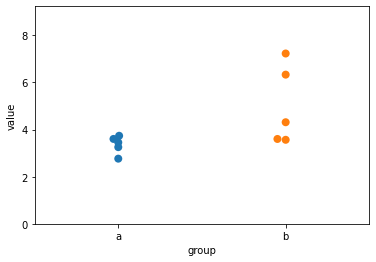

In [2]:
#generate normally distributed values
group_a = np.random.normal(4, 1,  5) #mu, sigma, n
group_b = np.random.normal(5, 1,  5) #mu, sigma, n
df = pd.DataFrame(np.concatenate((np.vstack((group_a, np.array(['a']*len(group_a)))).T,
                                  np.vstack((group_b, np.array(['b']*len(group_a)))).T)), columns = ['value', 'group'])
df['value'] = df['value'].astype('float')
ax = sns.swarmplot(data = df, x = 'group', y = 'value', s = 8)
plt.ylim(bottom = 0, top = df.value.max() + 2)
plt.show()

In [3]:
stats.ttest_ind(group_a, group_b)

Ttest_indResult(statistic=-2.141696254533902, pvalue=0.0646055063603198)

In [4]:
stats.ttest_ind([1,3,4,3,2], [4,5,6,6,5,4,5]) #input can just be list of numbers

Ttest_indResult(statistic=-4.273273869671518, pvalue=0.0016285682897101618)

In [5]:
#shapiro test for normal distribution
stats.shapiro(np.random.normal(10, 1,  50) ) #p value > 0.05 if it is normally distributed

ShapiroResult(statistic=0.9919436573982239, pvalue=0.9807631969451904)

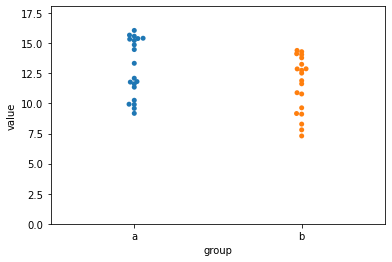

In [6]:
#generate random distribution of numbers, i.e., not normally distributed
group_a = np.random.uniform(low=9, high=17, size=(20,))
group_b = np.random.uniform(low=7, high=15, size=(20,))
df = pd.DataFrame(np.concatenate((np.vstack((group_a, np.array(['a']*len(group_a)))).T,
                                  np.vstack((group_b, np.array(['b']*len(group_a)))).T)), columns = ['value', 'group'])
df['value'] = df['value'].astype('float')
ax = sns.swarmplot(data = df, x = 'group', y = 'value')
plt.ylim(bottom = 0, top = df.value.max() + 2)
plt.show()

In [7]:
stats.shapiro(group_a)

ShapiroResult(statistic=0.8799253702163696, pvalue=0.017637841403484344)

In [8]:
stats.shapiro(group_b)

ShapiroResult(statistic=0.9161470532417297, pvalue=0.08355055004358292)

In [9]:
stats.mannwhitneyu(group_a, group_b)

MannwhitneyuResult(statistic=267.0, pvalue=0.0720454304673439)

In [10]:
stats.shapiro([4,5,6,6,5,4,5]) #example from value list

ShapiroResult(statistic=0.8577129244804382, pvalue=0.14439702033996582)

In [11]:
stats.mannwhitneyu([1,3,4,3,2], [4,5,6,6,5,4,5]) #example from value list

MannwhitneyuResult(statistic=1.0, pvalue=0.008167958654692957)

In [12]:
#example function that tests distribution then picks test accordingly
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

In [13]:
test_sig(np.random.normal(10, 1,  50), np.random.normal(13, 2,  40))

t-test


Ttest_indResult(statistic=-10.808567545708417, pvalue=8.002021519806372e-18)

In [14]:
test_sig(np.random.random(100)*1.4,np.random.random(100))

mann-whitney


MannwhitneyuResult(statistic=7075.0, pvalue=4.0031006370913845e-07)